In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns


In [2]:
data_df = pd.read_csv('./source/Dataset/analysis_copy.csv')

In [3]:
data_df.head()

,date,country,id,active,alco,ap_hi,ap_lo,cholesterol,gender,gluc,...,occupation,smoke,weight,disease,age_years,bmi,bp_normal,bp_elevated,bp_hypertension1,bp_hypertension2
0,2021-05-03,Indonesia,0,1,0,110,80,1,2,1,...,Architect,0,62.0,0,50,21.967120,0,0,1,0
1,2021-08-05,Malaysia,1,1,0,140,90,3,1,1,...,Accountant,0,85.0,1,55,34.927679,0,0,0,1
2,2022-11-13,Indonesia,2,0,0,130,70,3,1,1,...,Chef,0,64.0,1,51,23.507805,0,0,1,0
3,2018-10-31,Singapore,3,1,0,150,100,1,2,1,...,Lawyer,0,82.0,1,48,28.710479,0,0,0,1
4,2020-09-25,Singapore,4,0,0,100,60,1,1,1,...,Architect,0,56.0,0,47,23.011177,1,0,0,0


In [4]:
data_df.age_years.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

In [68]:
#data_30_df = data_df[(data_df.age_years > 29) & (data_df.age_years < 40) & (data_df.disease == 0)]
data_30_df = data_df[(data_df.age_years > 59) & (data_df.disease == 1)]
data_30_df.shape

(8744, 21)

In [69]:
data_30_df.age_years.unique()

array([61, 63, 60, 64, 62])

What are they habit?

In [70]:
bp_categories_counts = data_30_df.groupby(['country', 'bp_normal', 'bp_elevated', 'bp_hypertension1', 'bp_hypertension2']).size()
bp_categories_counts

country    bp_normal  bp_elevated  bp_hypertension1  bp_hypertension2
India      0          0            0                 1                    790
                                   1                 0                   1191
                      1            0                 0                     46
           1          0            0                 0                    118
Indonesia  0          0            0                 1                    787
                                   1                 0                   1266
                      1            0                 0                     58
           1          0            0                 0                    124
Malaysia   0          0            0                 1                    774
                                   1                 0                   1276
                      1            0                 0                     69
           1          0            0                 0                  

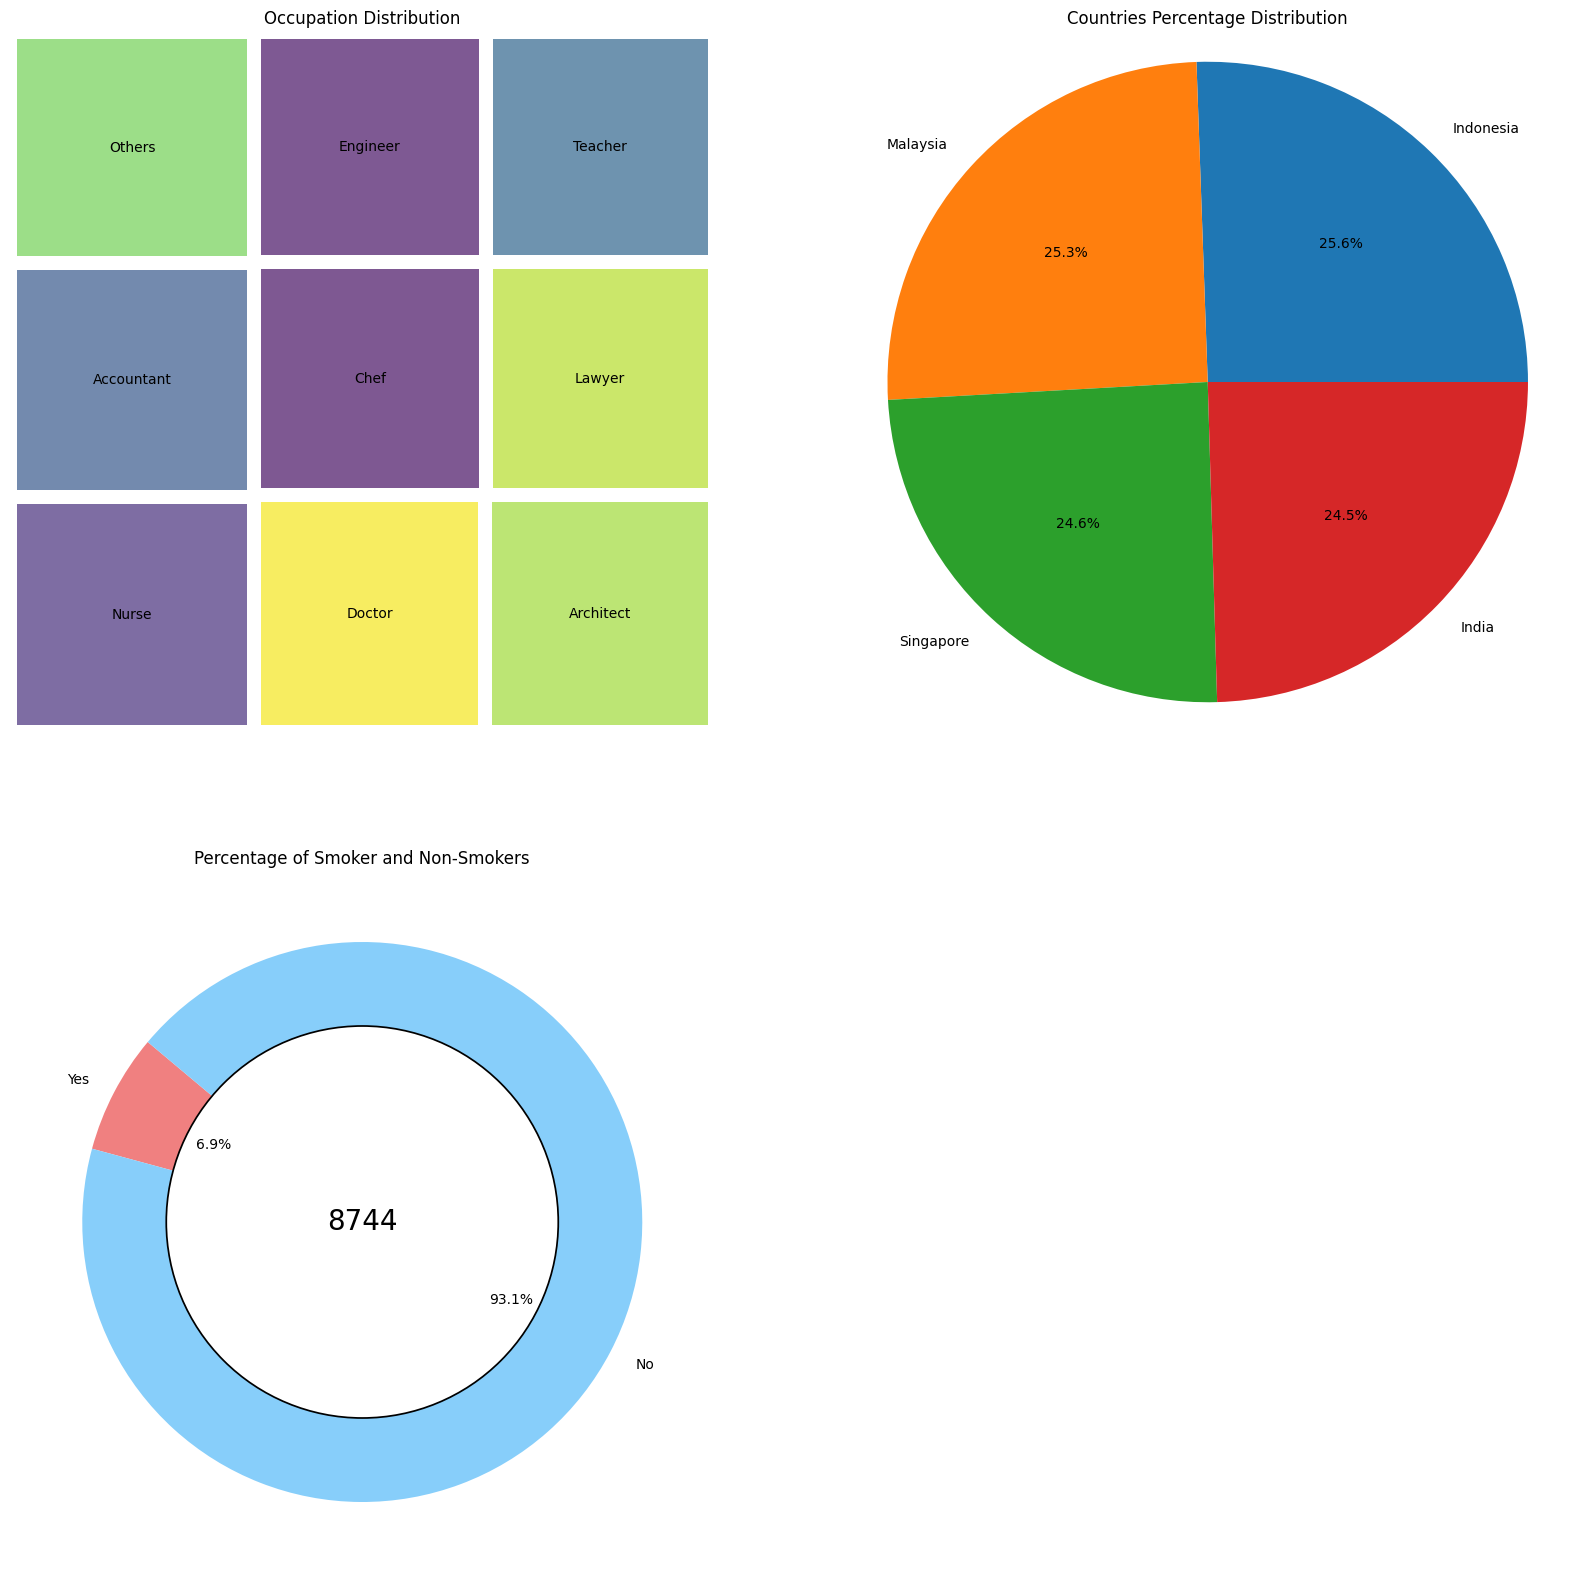

In [71]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)

#x_axi = data_30_df.occupation.drop_duplicates().values

occupation_counts = data_30_df.occupation.value_counts()

# Create bar chart
#plt.bar(occupation_counts.index, occupation_counts.values)
squarify.plot(sizes=occupation_counts.values, label=occupation_counts.index, alpha=0.7, pad= 0.25)

plt.axis("off")

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Occupation Distribution')


#2
plt.subplot(2,2,2)
country_counts = data_30_df.country.value_counts()

# Create pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Countries Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#Chart 3
plt.subplot(2,2,3)
#smoke_counts = data_30_df['smoke'].value_counts()
#smoke_counts = data_30_df['smoke']

no_of_1s = len(data_30_df[data_30_df['smoke'] == 1])
no_of_0s = len(data_30_df[data_30_df['smoke'] == 0])

#no_of_0s = 20
#no_of_1s = 80

total_smokecount = no_of_0s + no_of_1s

labels = ['Yes', 'No']
sizes = [no_of_1s, no_of_0s]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.pie(sizes, labels, colors, autopct='%1.1f%%', startangle=140)
centerpie = plt.Circle((0,0), 0.7, color='black', fc='white', linewidth=1.25, )
pie_fig = plt.gcf()
pie_fig.gca().add_artist(centerpie)

plt.title("Percentage of Smoker and Non-Smokers")
plt.text(0,0, total_smokecount, ha='center', va='center', fontsize=20)

#plt.axis('equals')

#plt.bar(0, smoke_counts.sum(), label='Total')
#plt.bar(0, smoke_counts[0], label='Non Smokers')


# Calculate percentages
#total = sum(smoke_counts)
#percentages = {key: (value / total) * 100 for key, value in smoke_counts.items()}

# Create bar chart
#plt.xlabel('Smoking Status')
#plt.ylabel('Percentage')
#plt.title('Percentage of Smokers and Non-Smokers')
#plt.legend()
#plt.xticks([])

plt.show()

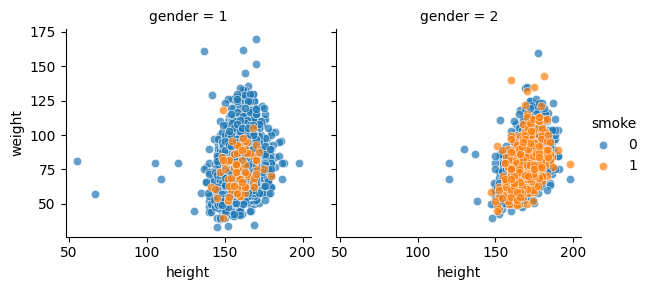

In [74]:
#sns.jointplot(x=data_30_df['height'], y=data_30_df['weight'], data=data_30_df, kind='scatter')
graph = sns.FacetGrid(data_30_df, col='gender', hue='smoke')
graph.map(sns.scatterplot, 'height', 'weight', alpha=0.7)

graph.add_legend()